In [1]:
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest  # Import Isolation Forest

In [2]:
df = pd.read_csv('/content/synthetic_network_traffic.csv')

## **Data Preproceccing**

In [3]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

,0
SourceIP,0
DestinationIP,0
SourcePort,0
DestinationPort,0
Protocol,0
BytesSent,0
BytesReceived,0
PacketsSent,0
PacketsReceived,0
Duration,0


In [10]:
df.head(30)

,SourceIP,DestinationIP,SourcePort,DestinationPort,Protocol,BytesSent,BytesReceived,PacketsSent,PacketsReceived,Duration,IsAnomaly
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,0
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0
5,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,0
6,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,0
7,0.361396,1.538037,-0.035826,1.564644,-2.619745,0.821903,0.087047,-0.299007,0.091761,-1.987569,0
8,-0.219672,0.357113,1.477894,-0.518270,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,0
9,0.097078,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587,0


In [8]:
df['IsAnomaly'].unique()

array([0, 1])

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply Min-Max scaling to specific columns
columns_to_normalize = ['BytesSent'	,'BytesReceived',	'PacketsSent','PacketsReceived','Duration']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df)

        SourceIP  DestinationIP  SourcePort  DestinationPort  Protocol  \
0       0.496714      -0.138264    0.647689         1.523030 -0.234153   
1      -0.463418      -0.465730    0.241962        -1.913280 -1.724918   
2       1.465649      -0.225776    0.067528        -1.424748 -0.544383   
3      -0.601707       1.852278   -0.013497        -1.057711  0.822545   
4       0.738467       0.171368   -0.115648        -0.301104 -1.478522   
...          ...            ...         ...              ...       ...   
999995  0.002725      -0.638022    0.840857         1.306959 -0.992010   
999996 -0.830555      -0.545716   -1.130178         0.021732 -0.565860   
999997  0.047510      -1.310967    0.173328        -1.367077  1.003435   
999998 -0.242768      -0.893310   -0.197664        -1.316390 -0.047899   
999999  0.702928      -0.506723   -0.927974        -0.190821 -0.037183   

        BytesSent  BytesReceived  PacketsSent  PacketsReceived  Duration  \
0        0.446327       0.636235   

## **Assign the Features for X and the Label for Y**

In [16]:
# Feature Engineering: Generate additional features (you can customize this)
df['TotalBytes'] = df['BytesSent'] + df['BytesReceived']
df['TotalPackets'] = df['PacketsSent'] + df['PacketsReceived']

In [21]:
X = df.drop(columns=['IsAnomaly'])
y = df['IsAnomaly']

In [22]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
iso_forest = IsolationForest(n_estimators=50, contamination='auto', random_state=42)
iso_forest.fit(X_train)

IsolationForest(n_estimators=50, random_state=42)

In [23]:
# Predict anomalies using the Isolation Forest
y_pred_iforest = iso_forest.predict(X_test)
y_pred_iforest = (y_pred_iforest == -1)  # Convert -1 (anomaly) to 1, 1 (normal) to 0

In [24]:
# Create the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, use 'sigmoid' for anomaly detection
])

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9948 - loss: 0.0356 - val_accuracy: 0.9949 - val_loss: 0.0323
Epoch 2/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9948 - loss: 0.0329 - val_accuracy: 0.9949 - val_loss: 0.0323
Epoch 3/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.9949 - loss: 0.0326 - val_accuracy: 0.9949 - val_loss: 0.0322
Epoch 4/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9950 - loss: 0.0320 - val_accuracy: 0.9949 - val_loss: 0.0324
Epoch 5/5
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9949 - loss: 0.0323 - val_accuracy: 0.9949 - val_loss: 0.0327


In [26]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Apply threshold (adjust as needed)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly'], zero_division=1)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

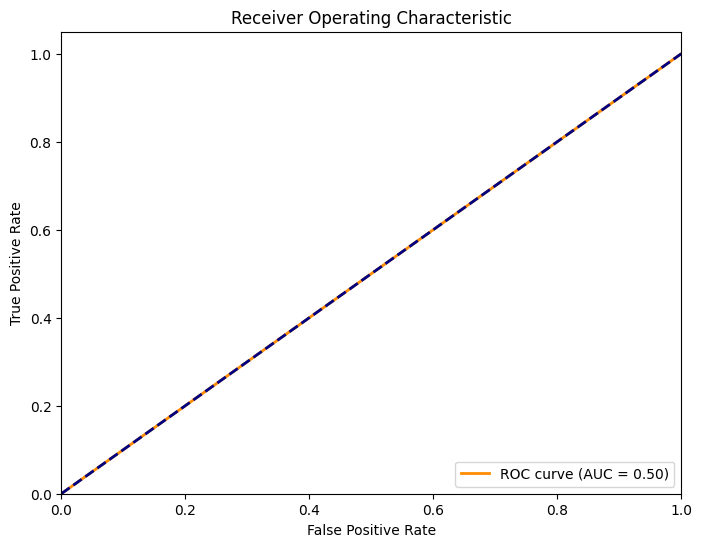

In [28]:
# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

Text(0.5, 1.0, 'Confusion Matrix')

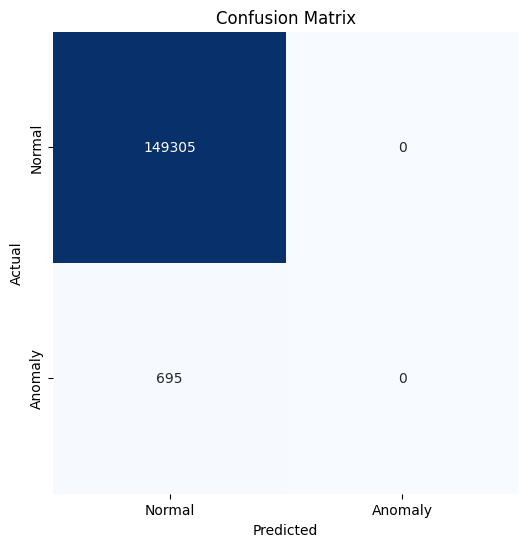

In [29]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [30]:
# Display Classification Report
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    149305
     Anomaly       1.00      0.00      0.00       695

    accuracy                           1.00    150000
   macro avg       1.00      0.50      0.50    150000
weighted avg       1.00      1.00      0.99    150000

